#  Import Data and Required Packages

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

#Importing models
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings
from sklearn.metrics import mean_squared_error, r2_score

In [22]:
#Importing the insurance.csv data file to a pandas dataframe.

df = pd.read_csv('data/insurance.csv')

In [23]:
#Preparing X and Y variables

X = df.drop(columns = ['charges'], axis = 1)
y = df['charges']

In [24]:
#Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [25]:
X = preprocessor.fit_transform(X)

In [26]:
X

array([[ 1.        ,  0.        ,  0.        , ..., -1.43876426,
        -0.45332   , -0.90861367],
       [ 0.        ,  1.        ,  1.        , ..., -1.50996545,
         0.5096211 , -0.07876719],
       [ 0.        ,  1.        ,  1.        , ..., -0.79795355,
         0.38330685,  1.58092576],
       ...,
       [ 1.        ,  0.        ,  1.        , ..., -1.50996545,
         1.0148781 , -0.90861367],
       [ 1.        ,  0.        ,  1.        , ..., -1.29636188,
        -0.79781341, -0.90861367],
       [ 1.        ,  0.        ,  0.        , ...,  1.55168573,
        -0.26138796, -0.90861367]])

In [27]:
X.shape

(1338, 11)

In [33]:
#Seperate dataset into train and test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

In [34]:
X_train.shape, X_test.shape

((1070, 11), (268, 11))

In [35]:
#Creating an Evaluation function to give all metrics after a model's training

def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square



In [36]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 6128.8695
- Mean Absolute Error: 4125.2389
- R2 Score: 0.7397
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5776.5533
- Mean Absolute Error: 4061.5950
- R2 Score: 0.7851


Lasso
Model performance for Training set
- Root Mean Squared Error: 6105.5476
- Mean Absolute Error: 4208.2781
- R2 Score: 0.7417
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5797.0192
- Mean Absolute Error: 4182.0187
- R2 Score: 0.7835


Ridge
Model performance for Training set
- Root Mean Squared Error: 6105.6089
- Mean Absolute Error: 4212.6410
- R2 Score: 0.7417
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5798.2986
- Mean Absolute Error: 4186.9019
- R2 Score: 0.7834


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 4772.3523
- Mean Absolute Error: 2855.8264


In [37]:
#arranging the models in decreasing order of the R2 Score on the test dataset

pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
7,CatBoosting Regressor,0.865093
5,Random Forest Regressor,0.864730
6,XGBRegressor,0.834077
8,AdaBoost Regressor,0.820565
0,Linear Regression,0.785064
1,Lasso,0.783538
2,Ridge,0.783443
3,K-Neighbors Regressor,0.764745
4,Decision Tree,0.681964


## The selected model is CatBoosting Regressor.

In [39]:
CatBoost_model = CatBoostRegressor(verbose=False)
CatBoost_model = CatBoost_model.fit(X_train, y_train)
y_pred = CatBoost_model.predict(X_test)
score = r2_score(y_test, y_pred) * 100
print("Accuracy of the model is %.2f" %score)

Accuracy of the model is 86.51


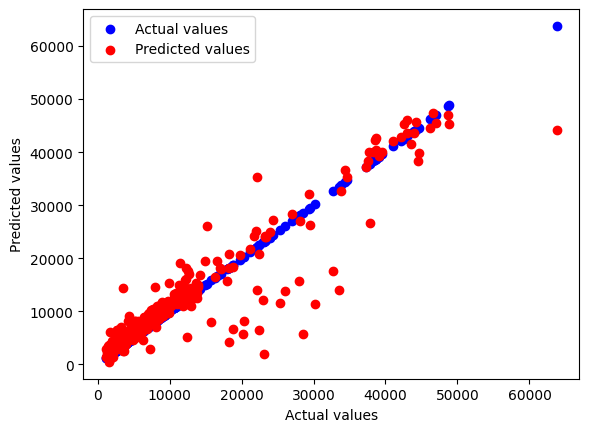

In [42]:
#plotting predicted values of y vs actual values of y

plt.scatter(y_test, y_test, color='blue', label='Actual values')
plt.scatter(y_test, y_pred, color='red', label='Predicted values')
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.legend()
plt.show()

<AxesSubplot:xlabel='charges'>

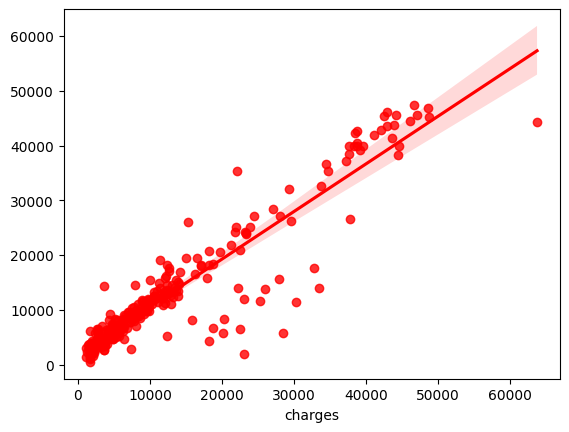

In [47]:
sns.regplot(x = y_test, y = y_pred, ci = 99, color = 'red')

In [50]:
#Difference between actual and predicted values:

pred_diff_df = pd.DataFrame({'Actual Value': y_test, 'Predicted Value': y_pred, 'Difference': y_test - y_pred})
pred_diff_df

,Actual Value,Predicted Value,Difference
764,9095.06825,11537.207715,-2442.139465
887,5272.17580,6476.486168,-1204.310368
890,29330.98315,32137.822982,-2806.839832
1293,9301.89355,10621.186999,-1319.293449
259,33750.29180,32684.574734,1065.717066
...,...,...,...
109,47055.53210,45537.719210,1517.812890
575,12222.89830,13222.940543,-1000.042243
535,6067.12675,6529.346757,-462.220007
543,63770.42801,44254.023178,19516.404832
